<a href="https://colab.research.google.com/github/AdarshKhatri01/DBMS-Notes/blob/main/SCHEDULE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. What is a Schedule?**
A schedule in DBMS is the sequence of execution of multiple transactions while maintaining the order of operations within each transaction. The goal is to ensure consistency, isolation, and correctness of the database.

✅ Why Scheduling?

- Manages concurrent transactions.
- Prevents conflicts and inconsistencies.
- Ensures serializability and recoverability.

<br>

---
<br>

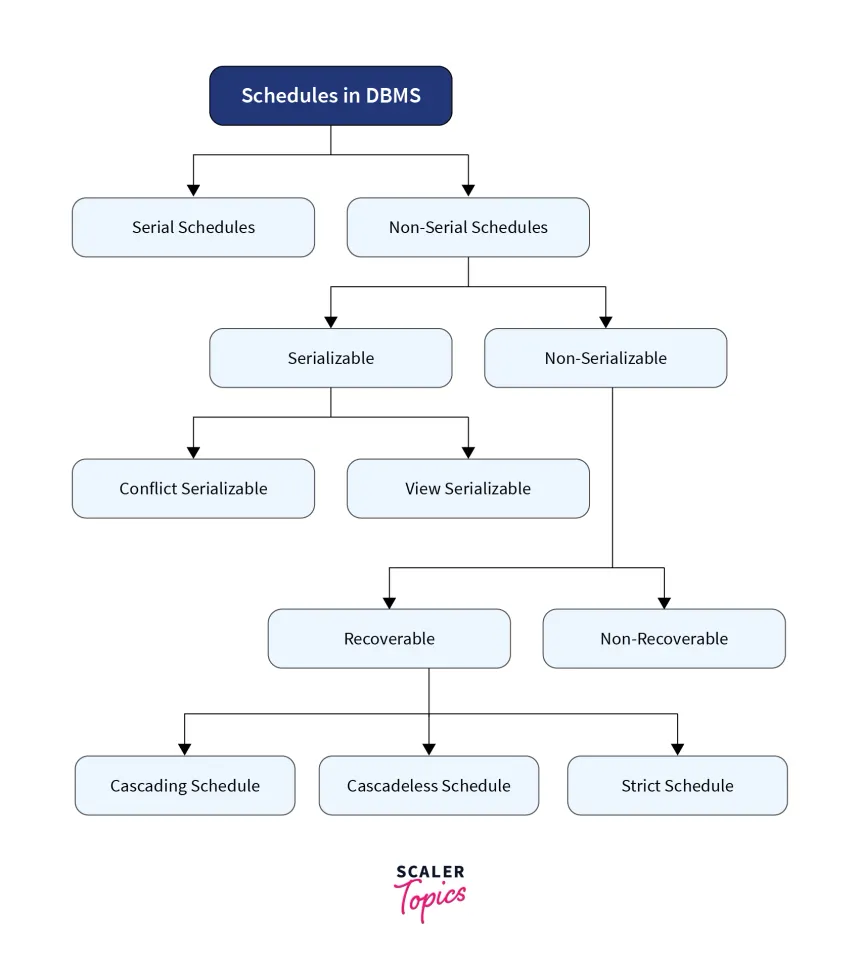

## **2. Types of Schedules in DBMS**  

### **1️⃣ Serial Schedule**  
- Transactions **execute one after another**, without interleaving.  
- Only **one transaction runs at a time**.  

✅ **Example:**  
```plaintext
T1: R(A) → W(A) → R(B) → W(B) → Commit
T2: R(A) → W(A) → R(B) → W(B) → Commit
```
🔹 **Advantage:** **No concurrency issues** (Always Consistent).  
🔹 **Disadvantage:** **Slow** (Utilizes only one transaction at a time).  

---

### **2️⃣ Non-Serial Schedule**  
- **Multiple transactions execute concurrently** (interleaved execution).  
- Can lead to **inconsistencies** if not properly controlled.  

✅ **Example:**  
```plaintext
T1: R(A) → W(A)
T2: R(B) → W(B)
T1: R(B) → W(B)
T2: R(A) → W(A)
```
🔹 **Advantage:** **Faster** execution.  
🔹 **Disadvantage:** **May cause conflicts** (Needs careful management).  

---

### **3️⃣ Serializable Schedule**  
- A **non-serial schedule** that **produces the same result** as a **serial schedule**.  
- Ensures **correctness and consistency**.  

✅ **Example (Equivalent to Serial Schedule):**  
```plaintext
T1: R(A) → W(A)
T2: R(B) → W(B)
T1: R(B) → W(B)
T2: R(A) → W(A)
```
🔹 **How to Check Serializability?**  
1. **Conflict Serializability** – Check if the schedule **can be converted into a serial schedule** by swapping non-conflicting operations.  
2. **View Serializability** – Check if the schedule **produces the same final result** as a serial schedule.  

✅ **Advantage:** **Ensures consistency** in concurrent execution.  
❌ **Disadvantage:** **May reduce performance** due to constraints.  

---

### **4️⃣ Conflict Serializable Schedule**  
- A **schedule is conflict-serializable** if transactions can be **rearranged (by swapping non-conflicting operations) to form a serial schedule**.  
- Conflicts occur when transactions **access the same data item and at least one of them is a write operation**.  

✅ **Example:**  
```plaintext
T1: R(A) → W(A)
T2: R(A) → W(A)
```
🔹 **Conflict between T1 and T2** due to `W(A)`.  

✅ **Conflict Graph:**  
- If there is a **cycle** in the dependency graph → **Not Conflict Serializable**.  
- If **no cycle** → **Conflict Serializable**.  

---

### **5️⃣ View Serializable Schedule**  
- A schedule is **view serializable** if it **produces the same final output as a serial schedule**, even if **not conflict serializable**.  

✅ **Example:**  
```plaintext
T1: R(A) → W(A)
T2: R(A) → W(A)
```
🔹 If both **read and write operations lead to the same final state**, the schedule is **view serializable**.  

---

### **6️⃣ Recoverable Schedule**  
- A schedule is **recoverable** if transactions commit only **after ensuring that all dependent transactions have committed**.  

✅ **Example:**  
```plaintext
T1: R(A) → W(A)
T2: R(A) → W(A) → Commit
T1: Commit
```
🔹 **Ensures that T1 commits only after T2 commits.**  

✅ **Advantage:** **Prevents cascading rollbacks**.  
❌ **Disadvantage:** **May slow down execution** due to dependency checks.  

---

### **7️⃣ Non-Recoverable Schedule (BAD)**
- A schedule where a transaction **commits before checking if the dependent transaction will fail**.  

❌ **Example:**  
```plaintext
T1: R(A) → W(A) → Commit
T2: R(A) → W(A) → Rollback
```
🔹 **T1 committed before knowing T2 would fail**, causing inconsistency.  

✅ **Fix:** **Use a recoverable schedule.**  

---

### **8️⃣ Cascadeless Schedule**  
- **Prevents cascading rollbacks** by ensuring that **transactions read only committed values**.  

✅ **Example:**  
```plaintext
T1: W(A) → Commit
T2: R(A) → W(A) → Commit
```
🔹 **T2 reads A only after T1 commits**, ensuring no rollback issues.  

✅ **Advantage:** **Prevents unnecessary rollbacks**.  
❌ **Disadvantage:** **Delays transaction execution** (waits for commit).  

---

## **3. Summary of Schedule Types**
| **Schedule Type** | **Description** |
|------------------|------------------|
| **Serial** | Transactions execute **one after another**. |
| **Non-Serial** | Transactions are **interleaved**, leading to concurrency. |
| **Serializable** | Non-serial schedule that is **equivalent to a serial one**. |
| **Conflict Serializable** | Non-serial schedule that can be **transformed into a serial** schedule by swapping non-conflicting operations. |
| **View Serializable** | Produces the **same final result** as a serial schedule. |
| **Recoverable** | Transactions **commit only after dependent transactions commit**. |
| **Non-Recoverable** | A transaction commits before checking dependencies (**causes data inconsistency**). |
| **Cascadeless** | **Prevents cascading rollbacks** by ensuring transactions read only committed data. |

---

## **4. Conclusion**
Scheduling ensures **safe and efficient execution of concurrent transactions** while maintaining **database consistency**. **Serializable, recoverable, and cascadeless schedules** are preferred for **reliable transaction management**.

## **Comparison of Schedules in DBMS**

| **Schedule Type**        | **Definition** | **Example** | **Issue** | **Good or Bad?** |
|-------------------------|---------------|------------|------------|--------------|
| **Recoverable Schedule** ✅ | A transaction **commits only after** all transactions whose values it has read have committed. | T1 commits → T2 reads → T2 commits | Prevents inconsistency | ✅ **Good** |
| **Irrecoverable Schedule** ❌ | A transaction **commits before** the transaction it depends on, leading to inconsistency if rollback happens. | T2 commits → T1 rolls back | Data inconsistency | ❌ **Bad** |
| **Cascading Schedule** ❌ | A rollback in one transaction **causes multiple rollbacks**. | T1 fails → T2 fails → T3 fails | Cascading rollback problem | ❌ **Bad** |
| **Cascadeless Schedule** ✅ | Transactions only read **committed** values, preventing rollback issues. | T1 commits → T2 reads → T2 commits | No rollback propagation | ✅ **Good** |
| **Strict Schedule** ✅ | A transaction can **neither read nor write** uncommitted data from another transaction. | T1 commits → T2 reads/writes | Prevents dirty reads and lost updates | ✅ **Best** |
| **Serial Schedule** ✅ | Transactions execute **one after another** (No interleaving). | T1 completes → T2 starts | 100% consistency, but slow | ✅ **Best (but inefficient)** |
| **Serializable Schedule** ✅ | A schedule that gives the **same result as a serial schedule** but allows interleaving. | Interleaved but serializable | Ensures consistency | ✅ **Best Practical Choice** |

---

## **How to Remember These?**
- **Recoverable = Always wait for previous transactions to commit before committing.**
- **Irrecoverable = Commit too early = Risk of inconsistency!**
- **Cascading = Rollback spreads like a virus.**
- **Cascadeless = Read only committed data = No rollback issues.**
- **Strict = No reading or writing uncommitted data = Strong consistency.**
- **Serializable = Equivalent to serial execution but faster.**